In [1]:
import pandas as pd
import numpy as np
import csv
import os
import tensorflow as tf

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
train.head()



,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,label
0,0,25.208249,-16.745748,50.869944,5.593472,1.188263,-6.014167,15.922007,-42.026918,-0.064017,...,6.731995,4.805149,-9.682240,-8.771275,159.124491,3.682115,-4.938090,130.068955,-8.231081,1
1,1,-86.931450,0.428227,2.874836,-8.064850,6.056867,6.124567,2.527879,-9.277728,-7.586313,...,-6.274857,-9.967576,-70.256324,-5.278519,-53.004625,6.484784,-6.389429,-26.164277,-4.909740,2
2,2,42.160934,7.857013,151.612757,9.639676,5.570139,-3.261364,10.814200,-37.394430,-5.791044,...,9.362207,18.524639,39.445002,-1.980687,-7.543595,-1.971843,8.034066,120.510705,7.754377,0
3,3,20.666944,8.680642,-56.449179,-9.814780,-2.382979,-14.596355,-3.621941,49.598995,11.138753,...,0.035327,11.019507,-2.254336,2.216576,65.238695,7.029985,8.940062,-40.426248,5.557970,1
4,4,35.946679,4.573736,-28.160212,-6.912971,4.879375,-0.131064,-2.509488,10.334908,-1.738533,...,-14.119385,-12.166055,50.745103,-2.205711,69.052119,-6.407847,3.399937,-23.468499,-11.269110,0


In [4]:
train['label'].unique()

array([1, 2, 0, 4, 3], dtype=int64)

In [5]:
train.shape

(7200, 252)

In [6]:
#sns.barplot(x='label', y ='feature0',data= train)

In [7]:
#sns.barplot(x='label', y ='feature1',data= train)

Lets seperate the features and class (label) so that we can build PCA model on features

In [8]:
varib_train = train[train.columns[1:251]]
varib_train.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249
0,25.208249,-16.745748,50.869944,5.593472,1.188263,-6.014167,15.922007,-42.026918,-0.064017,-6.492815,...,-10.528125,6.731995,4.805149,-9.682240,-8.771275,159.124491,3.682115,-4.938090,130.068955,-8.231081
1,-86.931450,0.428227,2.874836,-8.064850,6.056867,6.124567,2.527879,-9.277728,-7.586313,-1.802893,...,-5.154289,-6.274857,-9.967576,-70.256324,-5.278519,-53.004625,6.484784,-6.389429,-26.164277,-4.909740
2,42.160934,7.857013,151.612757,9.639676,5.570139,-3.261364,10.814200,-37.394430,-5.791044,0.073638,...,5.789345,9.362207,18.524639,39.445002,-1.980687,-7.543595,-1.971843,8.034066,120.510705,7.754377
3,20.666944,8.680642,-56.449179,-9.814780,-2.382979,-14.596355,-3.621941,49.598995,11.138753,-7.247519,...,11.307874,0.035327,11.019507,-2.254336,2.216576,65.238695,7.029985,8.940062,-40.426248,5.557970
4,35.946679,4.573736,-28.160212,-6.912971,4.879375,-0.131064,-2.509488,10.334908,-1.738533,-3.376448,...,9.468723,-14.119385,-12.166055,50.745103,-2.205711,69.052119,-6.407847,3.399937,-23.468499,-11.269110


In [9]:
label_train = train[train.columns[251]]
label_train.head()

0    1
1    2
2    0
3    1
4    0
Name: label, dtype: int64

### Train and Validation data split

In [10]:
label_train = pd.DataFrame(label_train)
label_train.head()

,label
0,1
1,2
2,0
3,1
4,0


In [11]:
label_train['label'].value_counts()

2    1485
4    1460
1    1426
0    1419
3    1410
Name: label, dtype: int64

In [12]:
exp_vals = [1419, 1426, 1485, 1410, 1460  ]
exp_labels = [0, 1, 2, 3, 4]

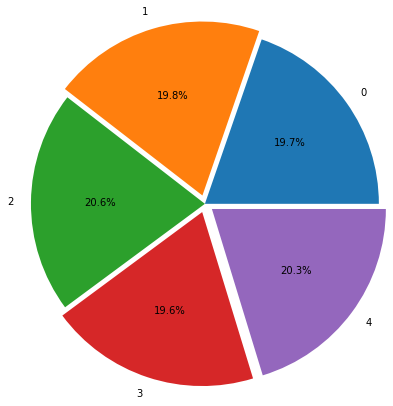

In [13]:
plt.axis('equal')
plt.pie(exp_vals, labels=exp_labels, radius = 2, autopct = '%0.1f%%', explode =[0, 0.1, 0, 0.1, 0.1])
plt.title('Class Imbalance')

plt.show()

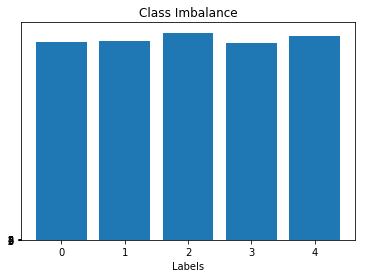

In [16]:
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
performance = [1419, 1426, 1485, 1410, 1460]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.yticks(y_pos, objects)
plt.xlabel('Labels')
plt.title('Class Imbalance')

plt.show()

Here the class is almost balanced, so no need to stratify the dataset while splitting into train and test.

In [17]:
# fix random seed for reproducibility
seed=123
np.random.seed(seed)
tf.set_random_seed(seed)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(varib_train, label_train, test_size=0.2, random_state=42)

### PCA
Let us first perform Principal Component Analysis (Maximizing Variance), so that we can get dimensional reduction.

In [19]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaled_varib = StandardScaler().fit_transform(X_train)

In [20]:
featu = pd.DataFrame(scaled_varib, columns = varib_train.columns)
featu.head(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249
0,-0.103911,0.580217,0.791684,-0.305096,-0.283777,1.552766,1.270944,0.841305,-0.515524,-0.352533,...,0.262068,1.040084,0.865269,2.278405,0.074957,-0.079620,-0.507741,0.114135,-1.773332,2.812978
1,-0.452833,1.156868,-0.145495,-0.272935,-2.427290,-1.785263,-0.298835,1.822623,1.603742,0.191305,...,0.533965,-0.225482,0.336538,-1.072022,-1.215299,1.000497,0.359937,0.588426,0.295056,0.454704
2,-0.534376,0.105881,0.649357,-1.157160,0.458578,-1.386874,0.502823,0.132731,-0.103855,0.712001,...,-1.969917,-0.327913,-0.062628,-0.594551,0.026148,0.856512,-1.231724,-0.783023,-1.730236,-0.840952
3,-0.312397,-2.514176,0.016537,0.897882,1.385167,-0.378515,-1.139866,-0.369244,-0.995283,-0.409179,...,0.535813,-0.461490,-0.550720,-0.320459,-0.499465,-0.633241,-1.559511,1.093014,-0.347714,-0.967533
4,0.323985,-1.662819,-0.390268,0.119913,-0.576780,0.446372,1.327566,-0.311707,0.879125,-0.324593,...,2.953627,-0.328189,1.152142,0.760618,0.776657,1.008135,-0.455803,-1.108925,0.119106,-0.533218
5,-0.411566,0.602862,-0.581797,-1.334528,0.152150,0.725512,-1.003607,0.936758,-0.024633,0.574655,...,0.278763,1.824477,1.248823,0.311082,0.266513,-0.403851,0.699479,-0.270720,-0.220804,0.170208
6,2.146870,-0.652982,1.168117,-0.811244,-0.712792,1.393956,1.237284,-0.857700,-0.652324,0.541043,...,0.601382,-0.934225,-0.173960,0.122413,-0.572021,-0.782811,0.325515,0.378928,-1.243596,0.034585
7,0.908853,0.870767,1.224585,-1.424621,0.281221,1.094680,-1.718731,0.518474,-0.519265,-1.895902,...,-0.122109,0.836715,0.581610,0.909378,-1.199361,-2.430653,-1.356299,0.527627,-0.876173,0.183232
8,-2.037733,-0.968552,0.431957,-0.080994,1.189603,1.290962,0.155344,1.034065,-0.136677,0.498806,...,1.000715,-0.957169,1.050153,-0.576062,-0.236101,-0.080911,-1.233018,0.331769,-2.946349,-0.198277
9,0.035131,0.290861,0.372490,0.571664,-1.770878,0.691864,-0.339462,0.970113,-0.846051,-0.317712,...,0.538656,-0.233342,-1.154521,-0.518282,-0.106411,0.585982,-0.927008,1.700596,0.428401,1.889362


In [21]:
#featu.to_csv('featu.csv')

lets figure out minimun number of Principal Components which can explain explains 95 % of variance

In [22]:
from sklearn.decomposition import PCA

pca = PCA(.95)

In [23]:
pca.fit(featu)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.n_components_

171

171 Principal Components are sufficient to explain 95 % of the variance.

Lets transform the training data and concat with the label 

In [25]:
df_train_feat = pca.transform(X_train)  # Need to perform this process for validation and test data also.
df_train_feat = pd.DataFrame(df_train_feat) # Here, we can not rename the columns as the number of columns has decreased from 250 to 172
df_train_feat.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,-72.281370,12.068572,79.223174,127.970706,90.874975,-81.679897,-159.974626,33.643303,13.943719,80.010974,...,24.860251,19.486001,-12.514470,20.880746,-9.526560,12.505053,-18.369100,-19.660701,2.478169,3.755231
1,5.957803,18.468456,46.679344,132.820318,95.983609,6.202293,3.012544,-62.822269,15.141807,-11.336139,...,1.755210,-16.658808,-3.363791,9.538086,34.503923,-14.297943,-1.981322,-19.117448,-23.928391,12.650820
2,-70.830209,22.874239,37.359257,0.217698,10.141556,114.902782,137.789691,-17.111703,-37.436965,60.816040,...,6.137655,18.581767,-3.373323,-0.992897,5.487295,-1.116680,17.031603,-11.410202,-10.116167,-14.000310
3,-55.227179,-147.154301,88.931206,-83.275574,-72.629173,23.696555,-4.458497,36.905969,19.247805,-8.787616,...,-10.146613,4.947590,-13.541931,-16.239599,-1.108255,10.362057,1.642150,1.549255,17.833130,-3.032503
4,-35.716747,24.966678,-77.588139,-63.951899,-91.639205,-63.838373,-123.055247,159.932954,-136.469128,-0.924887,...,9.207799,4.686454,-10.574170,-1.561117,-2.325341,4.427599,9.241305,9.336252,5.322563,15.657007


In [26]:
df_train_feat.shape

(5760, 171)

Since, we know that if the variables are highly correlated, the model will get biased. 
The R-Squared Value (in term of linear regression) or accuracy ( in terms of classification model) will be high.
This leads to overfitting of the models.

So, to remove the such discrepancies, we build PCA model for dimensional reduction in order to get rid off of the 
correlated variables.

Here, we performed Standard Scaling and PCA for reduction of the dimension, so we miss the header and 5 % of variance
is not explained. The removal of correlated variables, however, will also remove the overfitting and the model will be un-biased.

## Model Building

Before, we build the models, lets PCA transform all the data.

In [27]:
X_train_pca =  pca.transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)


In [28]:
X_valid_pca = pca.transform(X_valid)

### KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =5)

In [30]:
#Training the models 

knn.fit(X_train_pca, y_train)

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
# Predicting the response for the validation data set

y_pred = knn.predict(X_valid_pca)

Accuracy Calculation

In [32]:
from sklearn import metrics

ac_knn = metrics.accuracy_score(y_valid, y_pred)

print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.5138888888888888


### Naive Baise

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 

In [34]:
from sklearn.naive_bayes import GaussianNB

params = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}
nb = GaussianNB()
clf = GridSearchCV(nb, params, cv=10)

In [35]:
clf.fit(X_train_pca, y_train)

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
y_pred = clf.predict(X_valid_pca)

In [37]:
print(confusion_matrix(y_valid,y_pred))  
print(classification_report(y_valid,y_pred))

[[137  31  46  31  25]
 [ 25 133  33  35  29]
 [ 41  34 181  33  33]
 [ 34  29  28 169  28]
 [ 41  21  45  38 160]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       270
           1       0.54      0.52      0.53       255
           2       0.54      0.56      0.55       322
           3       0.55      0.59      0.57       288
           4       0.58      0.52      0.55       305

   micro avg       0.54      0.54      0.54      1440
   macro avg       0.54      0.54      0.54      1440
weighted avg       0.54      0.54      0.54      1440



In [38]:
nb_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the Naive Baise on the validation data set  is:", nb_ac)

The accuracy of the Naive Baise on the validation data set  is: 0.5416666666666666


### Support Vector Machine

In [39]:
from sklearn.svm import SVC

svm = SVC()
params = {"C":[1e-4, 1e-3, 1e-2, 1e-1, 1., 10], 'kernel':['rbf'], 'gamma':['auto','scale', 1e-3, 1e-2, 1e-1, 1., 10.]}
clf = GridSearchCV(svm, params, cv=2)

In [40]:
clf.fit(X_train_pca, y_train)

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10], 'kernel': ['rbf'], 'gamma': ['auto', 'scale', 0.001, 0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
y_pred = clf.predict(X_valid_pca)

In [42]:
print(confusion_matrix(y_valid,y_pred))  
print(classification_report(y_valid,y_pred))

[[254   6   1   7   2]
 [  7 231   3  10   4]
 [ 11   4 290   9   8]
 [  7   8   7 263   3]
 [  5   7  11   8 274]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       270
           1       0.90      0.91      0.90       255
           2       0.93      0.90      0.91       322
           3       0.89      0.91      0.90       288
           4       0.94      0.90      0.92       305

   micro avg       0.91      0.91      0.91      1440
   macro avg       0.91      0.91      0.91      1440
weighted avg       0.91      0.91      0.91      1440



In [43]:
svm_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the Naive Baise on the validation data set  is:", svm_ac)


The accuracy of the Naive Baise on the validation data set  is: 0.9111111111111111


In [44]:
# print best parameter after tuning 
print(clf.best_params_) 

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [45]:
# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Lets Document all the models and their corresponding Accuracies

In [46]:
models = pd.DataFrame({
    'Model': ['KNN Classifier','Naive Baise', 'Support Vector Machine'], #,'Neural Network'
    'Accuracy': [ac_knn ,nb_ac,  svm_ac]}) #ac_le
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Support Vector Machine,0.911111
1,Naive Baise,0.541667
0,KNN Classifier,0.513889


From the list above, we see that the Support Vector Machine is the best models for the given data set.

Lets work with the Support Vector Machine on the data without PCA Transformation.
The Goal is to check whether PCA Transformatio is useful or not.

In [47]:
svm= SVC()
params = {"C":[1e-4, 1e-3, 1e-2, 1e-1, 1., 10], 'kernel':['rbf'], 'gamma':['auto','scale', 1e-3, 1e-2, 1e-1, 1., 10.]}
clf = GridSearchCV(svm, params, cv=2)

In [48]:
clf.fit(X_train, y_train)

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10], 'kernel': ['rbf'], 'gamma': ['auto', 'scale', 0.001, 0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
y_pred = clf.predict(X_valid)

In [50]:
print(confusion_matrix(y_valid,y_pred))  
print(classification_report(y_valid,y_pred))

[[248   7   2   9   4]
 [  6 231   2  11   5]
 [ 10   7 287  10   8]
 [  8   5   6 263   6]
 [  7   7  13   8 270]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       270
           1       0.90      0.91      0.90       255
           2       0.93      0.89      0.91       322
           3       0.87      0.91      0.89       288
           4       0.92      0.89      0.90       305

   micro avg       0.90      0.90      0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440



In [51]:
svm_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the Naive Baise on the validation data set  is:", svm_ac)


The accuracy of the Naive Baise on the validation data set  is: 0.9020833333333333


In [52]:
# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Accuracies of:

#### SVM Model on PCA Transformed Data: 91.11 %
#### SVM Model on NOT PCA Transformed Data: 90.20 %
    

So, Finally, we found that the Support Vector Machine Model on the PCA Transformed Data is the best model for the current data set.

### SVM Model in the PCA Transformed Data on the Complete Training Data (Original) set

Lets Fit the SVM model with the tuned hyperparamters. (Technically, I am  repeating the same process)

In [53]:
taining_data = pca.transform(varib_train)

In [54]:
# y_label =  label_train

In [55]:
svm = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svm.fit(taining_data, label_train)

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Lets Make Prediction on the Test Data and create the Label

In [56]:
test = pd.read_csv('test.csv')
test.head()

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249
0,7200,-76.795547,-12.319618,-109.961631,-11.006934,-8.770868,-1.246577,3.875265,33.877412,7.757658,...,5.515601,10.530372,6.887168,-76.231907,3.374217,-128.668656,6.001156,2.619267,-14.869630,-4.718944
1,7201,15.860563,-5.344301,74.481876,1.267520,7.044210,6.391507,-7.713534,-1.336639,1.197008,...,-4.515135,4.041697,-9.170853,-38.501120,0.036281,22.997648,-4.050474,-16.322332,-54.813692,14.470087
2,7202,21.243900,-7.539082,-13.128054,-7.283449,1.430600,8.113846,-7.219936,-83.107625,-7.449005,...,-1.748731,-2.171528,16.292004,30.960787,0.380944,-86.906365,14.387590,-3.615364,160.603909,-11.330304
3,7203,8.999656,-0.397410,-31.769650,3.873494,0.255903,-5.713813,2.786370,28.037992,3.583793,...,19.629190,-0.578924,8.683254,1.959471,2.281506,-79.247119,-2.850041,-10.813797,-69.974758,-1.369170
4,7204,34.330833,-4.469938,-9.004407,-10.726552,-0.845002,0.722776,-1.836055,19.510244,2.785751,...,-5.110906,-2.840026,-7.043582,-28.169285,0.745229,70.852868,-5.185859,2.662763,-20.369640,7.001808


lets transform the data using PCA transformation

In [57]:
test.shape

(4800, 251)

In [58]:
varib_test = test[test.columns[1:252]]
varib_test.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249
0,-76.795547,-12.319618,-109.961631,-11.006934,-8.770868,-1.246577,3.875265,33.877412,7.757658,-4.003451,...,5.515601,10.530372,6.887168,-76.231907,3.374217,-128.668656,6.001156,2.619267,-14.869630,-4.718944
1,15.860563,-5.344301,74.481876,1.267520,7.044210,6.391507,-7.713534,-1.336639,1.197008,1.246036,...,-4.515135,4.041697,-9.170853,-38.501120,0.036281,22.997648,-4.050474,-16.322332,-54.813692,14.470087
2,21.243900,-7.539082,-13.128054,-7.283449,1.430600,8.113846,-7.219936,-83.107625,-7.449005,-4.787342,...,-1.748731,-2.171528,16.292004,30.960787,0.380944,-86.906365,14.387590,-3.615364,160.603909,-11.330304
3,8.999656,-0.397410,-31.769650,3.873494,0.255903,-5.713813,2.786370,28.037992,3.583793,-1.226325,...,19.629190,-0.578924,8.683254,1.959471,2.281506,-79.247119,-2.850041,-10.813797,-69.974758,-1.369170
4,34.330833,-4.469938,-9.004407,-10.726552,-0.845002,0.722776,-1.836055,19.510244,2.785751,-2.895020,...,-5.110906,-2.840026,-7.043582,-28.169285,0.745229,70.852868,-5.185859,2.662763,-20.369640,7.001808


In [59]:
df_test = pca.transform(varib_test) 
df_test = pd.DataFrame(df_test) # Here, we can not rename the columns as the number of columns has decreased from 250 to 172
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,139.140684,-1.686257,152.794179,33.708304,101.036819,66.038445,41.015960,-59.098069,-9.022778,-18.823446,...,-0.160270,8.713930,0.943364,12.732523,-8.116957,12.255437,-7.177633,10.862065,2.281750,-1.140750
1,-88.499740,-39.111166,17.502261,-16.228166,6.294465,-4.732554,-84.662052,10.904154,58.538459,29.880201,...,-3.220423,-7.310460,-5.256556,6.586925,16.739635,-4.119179,-1.599079,-6.324167,-1.741915,0.986431
2,65.005576,19.829687,-55.890738,-79.387423,-140.979718,-192.774670,137.707940,-154.667078,-68.221007,101.992166,...,-12.966883,23.202894,32.541119,24.593855,21.441786,-6.157702,-0.666000,9.317392,7.473276,-27.930306
3,69.999180,-18.320663,-30.084379,-32.353707,-29.246538,-2.131676,-57.250332,57.191430,-49.474159,17.026756,...,15.492582,8.322647,32.122489,7.886622,-13.792315,-1.596901,2.586708,0.364148,-7.920731,28.482060
4,-68.782463,51.404177,3.354197,-41.274213,-30.471113,-39.188835,22.972258,45.983283,47.811698,-30.889831,...,11.021506,-4.898881,-3.827252,-8.155138,-6.746637,-13.638107,-3.728549,-7.245157,-8.054540,-9.129635


In [60]:
df_test.shape

(4800, 171)

Now we need to make prediction on this test data set

Since, Support Vector Machine is the best model, we gonna use the same model for prediction.

In [61]:
Y_PRED = svm.predict(df_test)

In [62]:
Y_Pred = pd.DataFrame(Y_PRED)
Y_Pred.head()

,0
0,4
1,2
2,2
3,4
4,4


In [63]:
Y_Pred.rename(columns ={0: 'label'}, inplace = True)

In [64]:
Y_Pred.head()

,label
0,4
1,2
2,2
3,4
4,4


In [65]:
id_test = test[test.columns[0]]
test_id = pd.DataFrame(id_test)
test_id.head()

,id
0,7200
1,7201
2,7202
3,7203
4,7204


In [66]:
Pred_Data = pd.concat([test_id, Y_Pred], axis=1)
Pred_Data.head()

,id,label
0,7200,4
1,7201,2
2,7202,2
3,7203,4
4,7204,4


In [67]:
Pred_Data['label'].value_counts()

0    999
3    983
1    981
4    933
2    904
Name: label, dtype: int64

In [68]:
Pred_Data.to_csv('Final_Result.csv')